In [1]:
import cv2
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#original image
path_image = '/root/userspace/project/image/'
path_image_bottom = '/root/userspace/project/image_bottom/'
path_image_top = '/root/userspace/project/image_top/'
path_image_bottom_np = '/root/userspace/project/image_bottom_np/'
path_image_top_np = '/root/userspace/project/image_top_np/'

In [3]:
#load model
face_classifier = cv2.CascadeClassifier('/root/userspace/project/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/root/userspace/project/haarcascade_eye.xml')

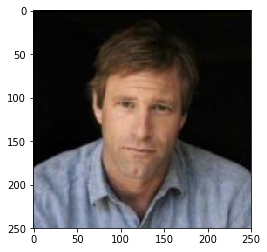

In [4]:
filename="/root/userspace/project/image/Aaron_Eckhart_0001.jpg"
img = cv2.imread(filename)
img=img[:,:,[2,1,0]] # BGR -> RGB
plt.imshow(img)

In [30]:
folderpath="/root/userspace/project/image/"
name="Aaron_Pena_0001.jpg"

# Face rotation to try to straighten up the ipnut face.
# centers: the eye positions
def crop_face(folderpath, name):
    filename=folderpath+name
    img = cv2.imread(filename)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(img_gray)

    centers=[]
    if faces.size != 0:
        for x, y, w, h in faces:
            #cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            image_face = img[y: y + h, x: x + w]
            eyes = eye_classifier.detectMultiScale(image_face)
            if len(eyes) != 0:
                for (ex, ey, ew, eh) in eyes:
                    centers.append([ex+ew/2, ey+eh/2])
                    #cv2.rectangle(image_face, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
                    #cv2.drawMarker(image_face, (ex+int(ew/2), ey+int(eh/2)), (255,0,0))
        image_face=image_face[:,:,[2,1,0]] # BGR -> RGB
        return image_face, centers

45.0 12.65255650055797 -16.173721749721015


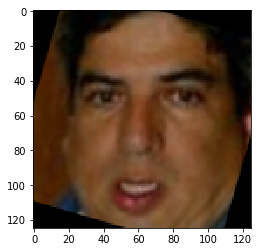

In [31]:
image_face_out, centers = crop_face(folderpath, name)
#plt.imshow(image_face_out)

def rotate_face(image_face, centers):
    height = image_face.shape[0]
    width = image_face.shape[1]
    center = (int(width/2), int(height/2))
    theta1=np.arctan(-(centers[0][1]-center[1])/(centers[0][0]-center[0]))*360/(2*np.pi)
    theta2=np.arctan( (centers[1][1]-center[1])/(centers[1][0]-center[0]))*360/(2*np.pi)
    angle = (theta2-theta1)/2
    print(theta1,theta2,angle)

    scale = 1.0
    #getRotationMatrix2D関数
    trans = cv2.getRotationMatrix2D(center, angle, scale)
    # apply rotation
    image_face_rotated = cv2.warpAffine(image_face, trans, (width,height))
    return image_face_rotated, angle

image_face_out, angle = rotate_face(image_face_out, centers)
plt.imshow(image_face_out)

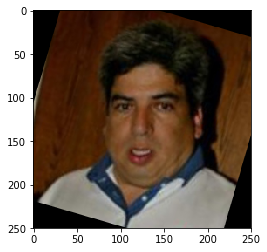

In [40]:
filename=folderpath+name
img = cv2.imread(filename)
img=img[:,:,[2,1,0]]
plt.imshow(img)
height = img.shape[0]
width = img.shape[1]
center = (int(width/2), int(height/2))
scale = 1.0
trans = cv2.getRotationMatrix2D(center, angle, scale)
image_face_rotated = cv2.warpAffine(img, trans, (width,height))
plt.imshow(image_face_rotated)

In [ ]:
#image_face_out=crop_face(folderpath, name):
